In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters[0], kernel_size=(1, 1), activation='relu', padding='same')(x)
    
    branch3x3 = Conv2D(filters[1], kernel_size=(1, 1), activation='relu', padding='same')(x)
    branch3x3 = Conv2D(filters[2], kernel_size=(3, 3), activation='relu', padding='same')(branch3x3)
    
    branch5x5 = Conv2D(filters[3], kernel_size=(1, 1), activation='relu', padding='same')(x)
    branch5x5 = Conv2D(filters[4], kernel_size=(5, 5), activation='relu', padding='same')(branch5x5)
    
    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters[5], kernel_size=(1, 1), activation='relu', padding='same')(branch_pool)
    
    output = Concatenate()([branch1x1, branch3x3, branch5x5, branch_pool])
    
    return output

In [5]:
# Define the Inception Network
def inception_net():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    x = Conv2D(64, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding='same')(x)
    x = Conv2D(192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, [192, 96, 208, 16, 48, 64])
    x = inception_module(x, [160, 112, 224, 24, 64, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, [256, 160, 320, 32, 128, 128])
    x = inception_module(x, [384, 192, 384, 48, 128, 128])
    
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    
    outputs = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [6]:
# Create the Inception Network model
model = inception_net()

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 41s 30ms/step - loss: 1.8492 - accuracy: 0.2889 - val_loss: 1.5313 - val_accuracy: 0.4260
Epoch 2/10
391/391 [==============================] - 10s 25ms/step - loss: 1.4469 - accuracy: 0.4642 - val_loss: 1.3363 - val_accuracy: 0.5209
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 1.2468 - accuracy: 0.5458 - val_loss: 1.2049 - val_accuracy: 0.5626
Epoch 4/10
391/391 [==============================] - 9s 24ms/step - loss: 1.1214 - accuracy: 0.5980 - val_loss: 1.1335 - val_accuracy: 0.5944
Epoch 5/10
391/391 [==============================] - 9s 22ms/step - loss: 1.0062 - accuracy: 0.6398 - val_loss: 1.1627 - val_accuracy: 0.5906
Epoch 6/10
391/391 [==============================] - 9s 24ms/step - loss: 0.9214 - accuracy: 0.6723 - val_loss: 1.0168 - val_accuracy: 0.6430
Epoch 7/10
391/391 [==============================] - 9s 24ms/step - loss: 0.8366 - accuracy: 0.7049 - val_loss: 0.9666 - val_accuracy: 0.66

In [9]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.9663 - accuracy: 0.6892
Test loss: 0.9663223624229431
Test accuracy: 0.6891999840736389


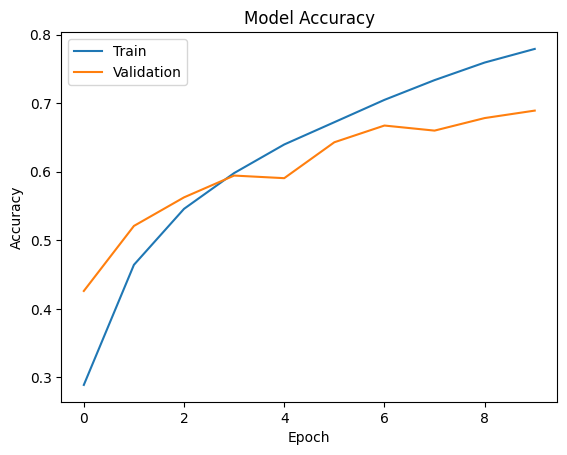

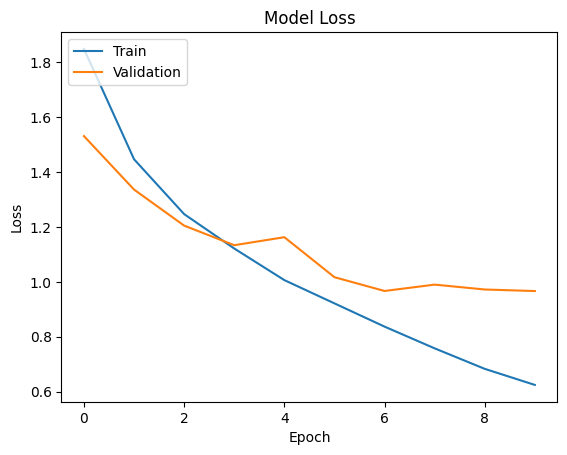

In [10]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
